### Observations and Insights


In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. 

There is a short analysis of received data:

- By looking at the bar chart, we can understand the number of mice which are used for this test in Capomulin and Ramicane are more than others and Propriva has the least number of mice.

- According to the pie chart 50.6% of samples are male and 49.4% are female, which is an equal number of each sex in the study.

- Displayed boxplot shows us Capomulin and Ramicane treatments have a better effect in reducing the tumor volume.

- It can be inferred from the scatter plot that there is a strong positive relationship between weight (g) and average tumor volume (mm3) in Capomulin treatment, which means by increasing weight the tumor volume grows as well. The r-squared in this model is 0.70. In other words, 70% of data explaine this model.


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/02-Homework_05-Matplotlib_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Resources/02-Homework_05-Matplotlib_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
lab_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [19]:
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [20]:
mouse_metadata.shape

(249, 5)

In [21]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [22]:
study_results.shape

(1893, 4)

In [23]:
# Checking the number of mice.
lab_df["Mouse ID"].count()

1893

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_time = lab_df[lab_df.duplicated(["Mouse ID","Timepoint"])]
duplicated_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = lab_df[lab_df.duplicated(["Mouse ID"])]
duplicated_mouse.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = lab_df.drop_duplicates("Mouse ID")
clean_mouse.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mouse["Mouse ID"].count()

249

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
lab_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_lab_mean = lab_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean() 
group_lab_median = lab_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
group_lab_variance = lab_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
group_lab_standard_deviation = lab_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
group_lab_sem = lab_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean": group_lab_mean, "Median": group_lab_median, "Varians": group_lab_variance, "Standard Deviation": group_lab_standard_deviation, "SEM": group_lab_sem })
summary_statistics

,Mean,Median,Varians,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


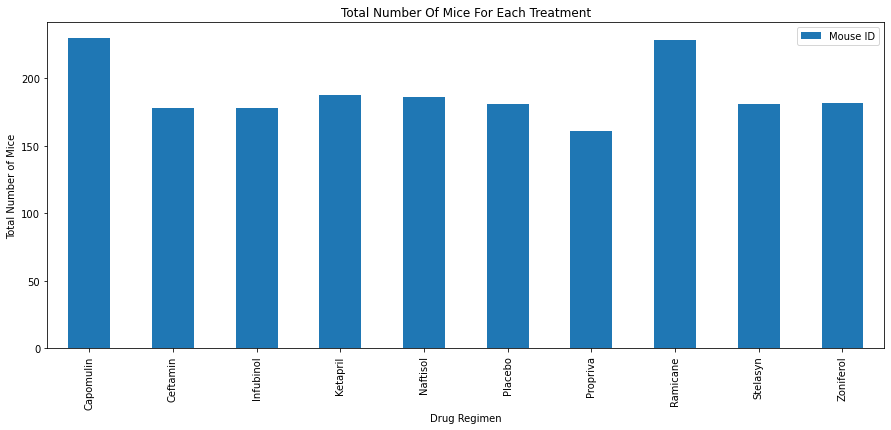

<Figure size 432x288 with 0 Axes>

In [200]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
group_treatment = pd.DataFrame(lab_df.groupby("Drug Regimen")["Mouse ID"].count())
group_treatment.plot(kind="bar", figsize=(15,6))
plt.title("Total Number Of Mice For Each Treatment")
plt.ylabel("Total Number of Mice")
plt.savefig("barchart.png")
plt.show()
plt.tight_layout()

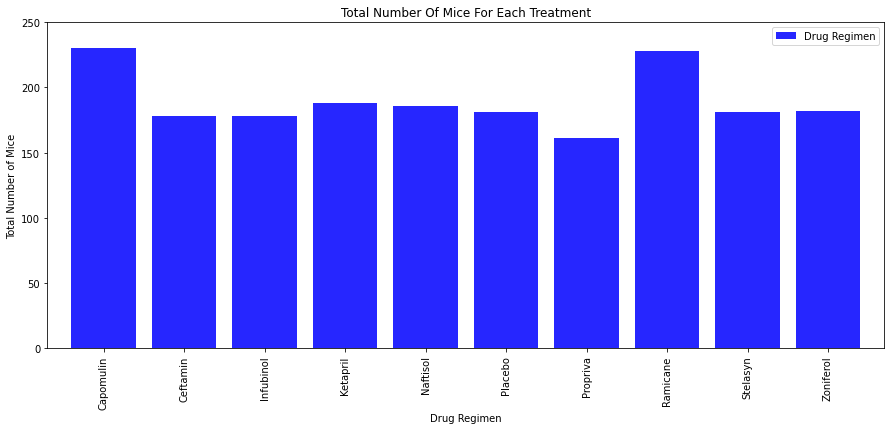

In [136]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
group_treatment = pd.DataFrame(lab_df.groupby("Drug Regimen")["Mouse ID"].count())
treatment_list = group_treatment.index.tolist()
mice_list = group_treatment["Mouse ID"].tolist()
x_axis = np.arange(len(mice_list))
plt.figure(figsize=(15,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,treatment_list, rotation='vertical')
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_list)+20)
plt.title("Total Number Of Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.bar(x_axis, mice_list,width=0.8, color='blue', alpha=0.85, align="center")
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.show()

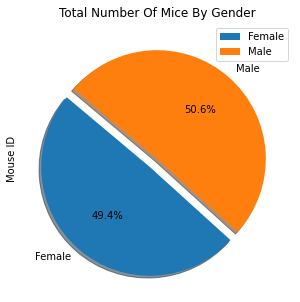

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender = pd.DataFrame(lab_df.groupby("Sex")["Mouse ID"].count())
group_gender.plot(kind="pie", explode=(0.1, 0), subplots=True, figsize=(10, 5), autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Number Of Mice By Gender")
plt.savefig("piechart.png")
plt.show()

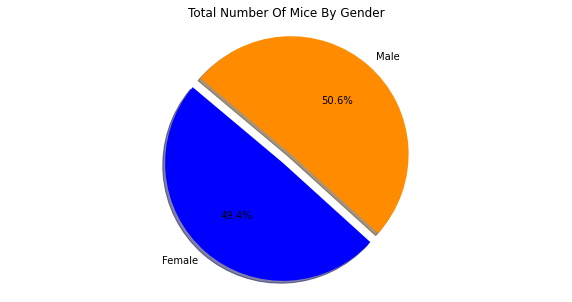

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
group_gender = pd.DataFrame(lab_df.groupby("Sex")["Mouse ID"].count())
sex = ["Female", "Male"]
total = [935, 958]
colors = ["blue", "darkorange"]
explode = (0.1, 0)
plt.figure(figsize=(10, 5))
plt.pie(total, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Number Of Mice By Gender")
plt.axis("equal")
plt.show()

In [71]:
# Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
special_regimen = lab_df[lab_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = pd.DataFrame(special_regimen.groupby("Mouse ID").max()["Timepoint"]) 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(great_timepoint, special_regimen, on=("Mouse ID","Timepoint"),how="left")

In [148]:
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [329]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
data_plotting_list  =  []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

for x in drug_regimen:
    quartiles  =  merge_df.loc[merge_df["Drug Regimen"] == x,"Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr  =  upperq-lowerq
    lower_bound  =  lowerq - (1.5*iqr)
    upper_bound  =  upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

    print(x)
    print(f"------------")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")    
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

Capomulin
------------
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
------------
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
------------
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers

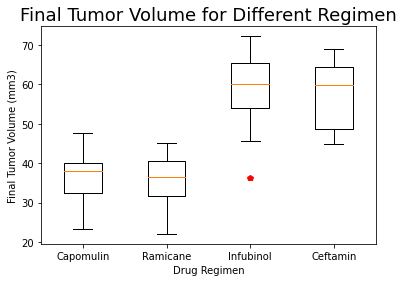

In [330]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

for i in drug_regimen: 
        data_plotting = merge_df.loc[merge_df["Drug Regimen"] == i,"Tumor Volume (mm3)"]
        data_plotting_list.append(data_plotting)
fig, ax = plt.subplots()
ax.boxplot(data_plotting_list, sym = 'rp')
plt.xticks([1,2,3,4],drug_regimen)
ax.set_title('Final Tumor Volume for Different Regimen',fontsize =18)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)') 
plt.savefig("boxplot.png")
plt.show()
    

In [93]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_whole_df = lab_df.loc[lab_df["Drug Regimen"] == "Capomulin"]
capomulin_whole_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0


In [94]:
# choose one random mouse
sample_mouse = capomulin_whole_df.loc[capomulin_whole_df["Mouse ID"] == "s185"]
sample_mouse.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0


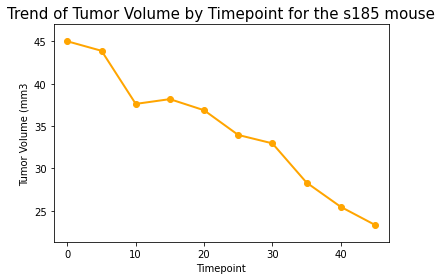

In [116]:
# choose the data of a random mouse as sample
s185_mouse = plt. plot(sample_mouse["Timepoint"], sample_mouse["Tumor Volume (mm3)"], marker="o", color="orange", linewidth=2.0)
# plot out the trend of chosen mouse
plt.title('Trend of Tumor Volume by Timepoint for the s185 mouse',fontsize =15)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3')
plt.xlim(min(sample_mouse["Timepoint"])-2, max(sample_mouse["Timepoint"])+2)
plt.ylim(min(sample_mouse['Tumor Volume (mm3)'])-2, max(sample_mouse['Tumor Volume (mm3)'])+2)
plt.show()

In [96]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
selected_capomulin = capomulin_whole_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
grouped_capomulin = pd.DataFrame(selected_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
grouped_capomulin = grouped_capomulin.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
grouped_capomulin.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


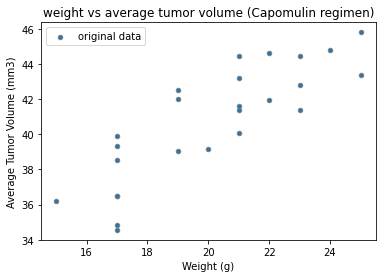

In [197]:
# Plot out weight versus average tumor volume
grouped_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", title="weight vs average tumor volume (Capomulin regimen)", label='original data', edgecolors = 'grey')
plt.savefig("scatterplot.png")
plt.show()

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight= grouped_capomulin.iloc[:,1]
average_tumor_volume= grouped_capomulin.iloc[:,2]
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


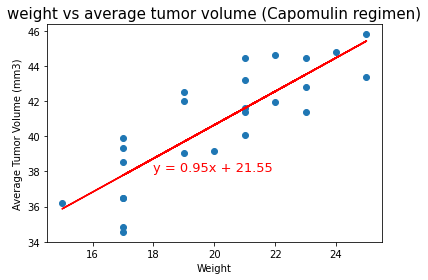

In [196]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = grouped_capomulin['Weight (g)']
y_values = grouped_capomulin['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38), fontsize=13,color="red")
plt.title('weight vs average tumor volume (Capomulin regimen)',fontsize =15)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("linear regression model.png")
plt.show()